<a href="https://colab.research.google.com/github/bmanasareddy05/traffic_vol_predict/blob/main/traffic_volume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FINDING** **HEAVY** **TRAFFIC** **INDICATORS**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data=pd.read_csv("/content/Metro_Interstate_Traffic_Volume.csv")
data.describe()
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


,traffic_volume
count,48204.000000
mean,3259.818355
std,1986.860670
min,0.000000
25%,1193.000000
50%,3380.000000
75%,4933.000000
max,7280.000000


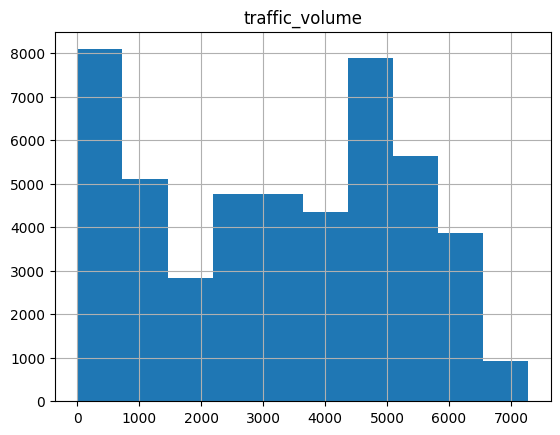

In [2]:
data.hist('traffic_volume')
data['traffic_volume'].describe()

In [3]:
data['date_time']=pd.to_datetime(data['date_time'])

In [4]:
hour=data['date_time'].dt.hour
daytime=data.loc[(data['date_time'].dt.hour>=6) & (data['date_time'].dt.hour<=18)]
nighttime=data.loc[(data['date_time'].dt.hour>=18) | (data['date_time'].dt.hour<=6)]
nighttime.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


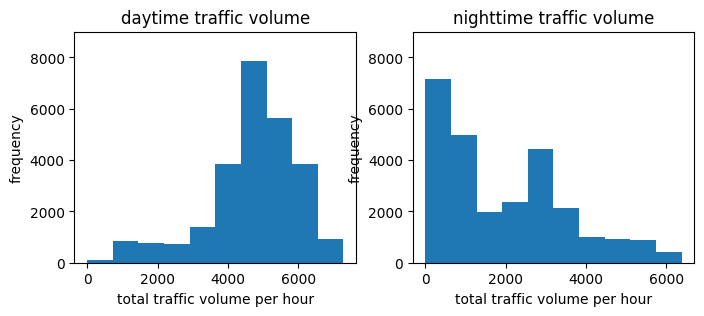

In [5]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'])
plt.ylim([0,9000])
plt.xlabel("total traffic volume per hour")
plt.ylabel("frequency")
plt.title("daytime traffic volume")
plt.subplot(1,2,2)
plt.ylim([0,9000])
plt.hist(nighttime['traffic_volume'])
plt.xlabel("total traffic volume per hour")
plt.ylabel("frequency")
plt.title("nighttime traffic volume")
plt.show()

In [6]:
daytime['traffic_volume'].describe()

,traffic_volume
count,25964.000000
mean,4712.087429
std,1281.625783
min,0.000000
25%,4232.000000
50%,4849.500000
75%,5597.000000
max,7280.000000


In [7]:
nighttime['traffic_volume'].describe()

,traffic_volume
count,26313.000000
mean,1972.432714
std,1543.019592
min,0.000000
25%,580.000000
50%,1570.000000
75%,3005.000000
max,6386.000000


<ipython-input-8-5ce51d7cc609>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['month'] = daytime['date_time'].dt.month


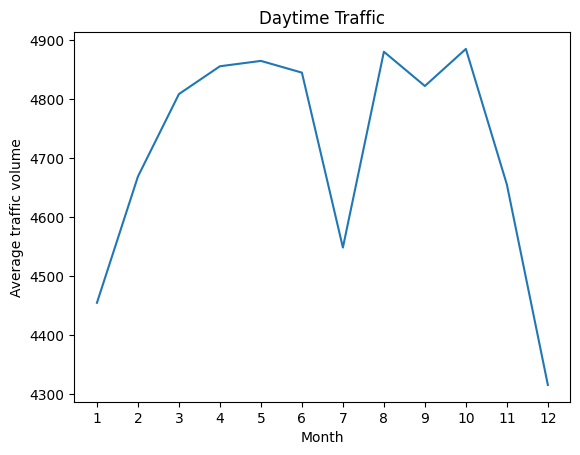

In [8]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean(numeric_only=True)
by_month['month']=daytime['date_time'].dt.month
volume=by_month['traffic_volume']
plt.plot(volume)
x = np.arange(1, 13, 1)
plt.xticks(x)
plt.title("Daytime Traffic")
plt.xlabel("Month")
plt.ylabel("Average traffic volume")
plt.show()

<ipython-input-9-3f12079272fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['dayofweek'] = daytime['date_time'].dt.dayofweek


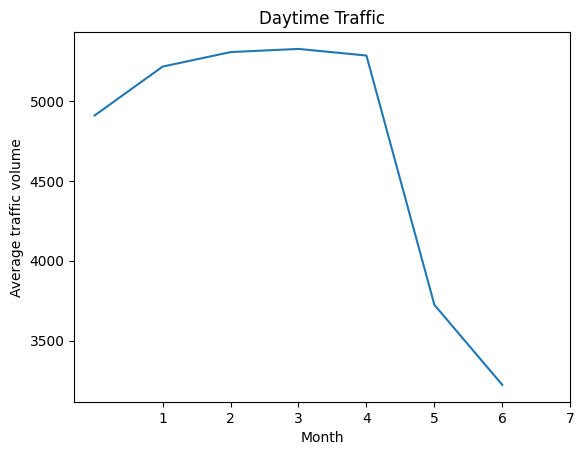

In [9]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean(numeric_only=True)
#by_month['month']=daytime['date_time'].dt.dayofweek
volume=by_dayofweek['traffic_volume']
plt.plot(volume)
x = np.arange(1,8,1)
plt.xticks(x)
plt.title("Daytime Traffic")
plt.xlabel("Month")
plt.ylabel("Average traffic volume")
plt.show()

<ipython-input-10-fc7c4d9165ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['hour'] = daytime['date_time'].dt.hour


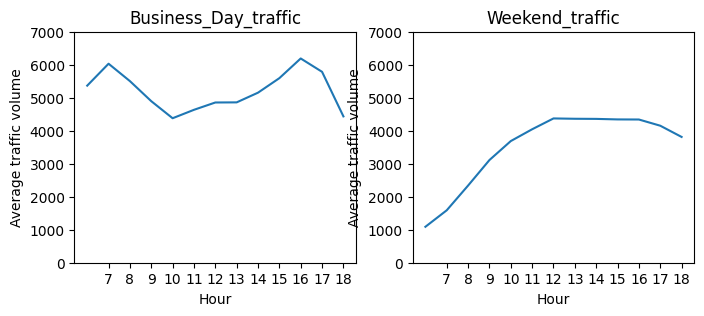

In [10]:
daytime['hour'] = daytime['date_time'].dt.hour
business_days=daytime.copy()[daytime['dayofweek']<=4]
weekend=daytime.copy()[daytime['dayofweek']>4]
by_hour_business = business_days.groupby('hour').mean(numeric_only=True)
by_hour_weekend = weekend.groupby('hour').mean(numeric_only=True)
vol_business=by_hour_business['traffic_volume']
vol_weekend=by_hour_weekend['traffic_volume']

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(vol_business)
plt.ylim(0,7000)
x=np.arange(7,19,1)
plt.xticks(x)
plt.title("Business_Day_traffic")
plt.xlabel("Hour")
plt.ylabel("Average traffic volume")
plt.subplot(1,2,2)
plt.ylim(0,7000)
plt.plot(vol_weekend)
plt.xticks(x)
plt.title("Weekend_traffic")
plt.xlabel("Hour")
plt.ylabel("Average traffic volume")
x=np.arange(7,19,1)
plt.xticks(x)
plt.show()

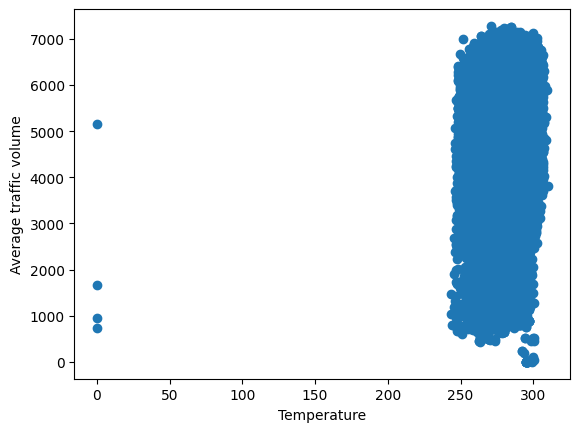

In [11]:
plt.scatter(daytime['temp'],daytime['traffic_volume'])
plt.xlabel("Temperature")
plt.ylabel("Average traffic volume")
plt.show()

In [12]:
by_weather_main = daytime.groupby('weather_main').mean(numeric_only=True)
print(by_weather_main)
by_weather_description = daytime.groupby('weather_description').mean(numeric_only=True)

                    temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
weather_main                                                               
Clear         283.025724  0.000000  0.000000    1.644855     4722.645962   
Clouds        282.618130  0.000000  0.000000   62.851621     4825.436729   
Drizzle       284.413783  0.172771  0.000000   84.281186     4791.208589   
Fog           278.295933  0.142467  0.001133   59.655556     4331.733333   
Haze          275.131126  0.039181  0.000000   62.824801     4594.139932   
Mist          279.606984  0.253160  0.000731   71.601202     4558.200401   
Rain          286.995476  3.715700  0.000269   75.593001     4771.561892   
Smoke         291.704615  0.810769  0.000000   52.307692     4317.076923   
Snow          267.925437  0.012915  0.001660   80.416350     4358.179975   
Squall        296.730000  1.020000  0.000000   75.000000     4211.000000   
Thunderstorm  293.075010  1.222826  0.000000   74.468938     4579.394790   

           

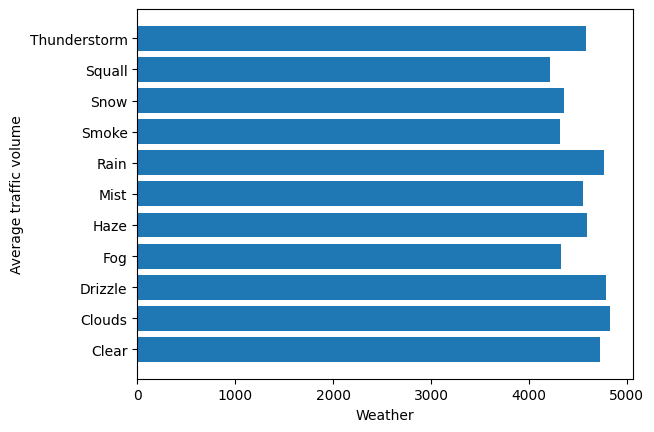

In [13]:
vol=by_weather_main['traffic_volume']
reason=by_weather_main.index.values
plt.barh(reason,vol)
plt.xlabel("Weather")
plt.ylabel("Average traffic volume")
plt.show()
#

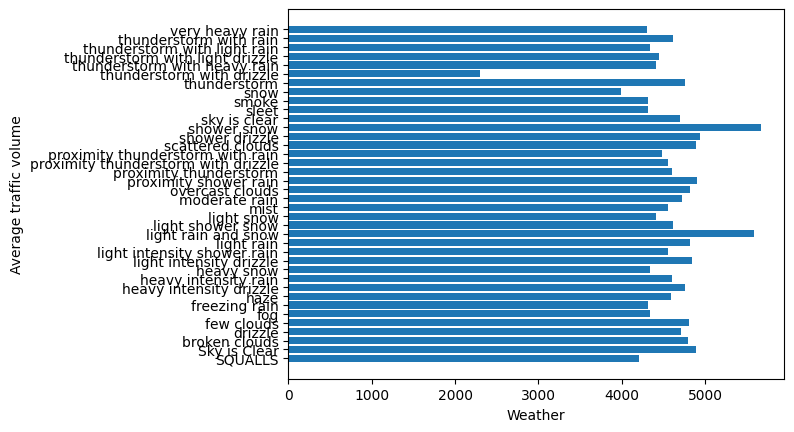

In [14]:
vol=by_weather_description['traffic_volume']
reason=by_weather_description.index.values
plt.barh(reason,vol)
plt.xlabel("Weather")
plt.ylabel("Average traffic volume")
plt.show()

**ACTUAL VS PREDICTED IN LINEAR REGRESSION**

<ipython-input-15-b3408559da4b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
<ipython-input-15-b3408559da4b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


Mean Squared Error: 1612239.3115445513


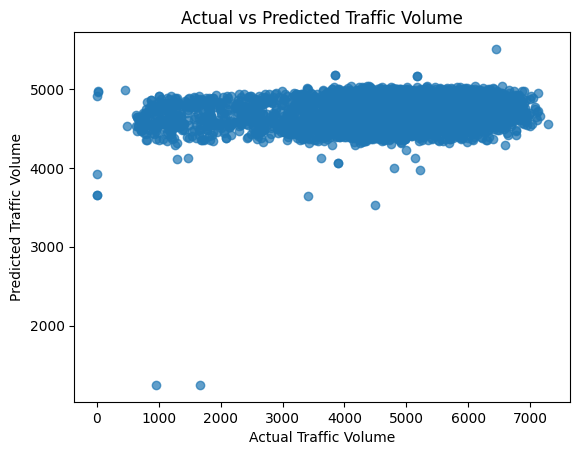

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = daytime[['temp', 'rain_1h', 'snow_1h', 'clouds_all']]
y = daytime['traffic_volume']

X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
X.fillna(0, inplace=True)

# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predicting on Test Data
y_pred = model.predict(X_test_poly)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot Actual vs Predicted
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Actual vs Predicted Traffic Volume")
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.show()


**LINEAR REGRESSION**

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

daytime['hour'] = daytime['date_time'].dt.hour
daytime['day'] = daytime['date_time'].dt.day
daytime['month'] = daytime['date_time'].dt.month
daytime['weekday'] = daytime['date_time'].dt.weekday


X = daytime[['hour', 'day', 'month', 'weekday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]
y = daytime['traffic_volume']

X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
X.fillna(0, inplace=True)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Training the model
model = LinearRegression()
model.fit(X_poly_scaled, y)

# Predicting traffic volume for new data
new_data = np.array([[15, 10, 12, 4, 260, 0.2, 0, 80]])
# hour=15, day=10, month=12, weekday=4 (Friday), temp=22°C, rain=0.2mm, snow=0mm, clouds=80%
new_data_poly = poly.transform(new_data)
new_data_scaled = scaler.transform(new_data_poly)

# Predicting traffic volume
predicted_traffic_volume = model.predict(new_data_scaled)
print(f"Predicted Traffic Volume: {predicted_traffic_volume[0]}")


Predicted Traffic Volume: 5128.5902397216705


<ipython-input-16-859bb263d515>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['hour'] = daytime['date_time'].dt.hour
<ipython-input-16-859bb263d515>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['day'] = daytime['date_time'].dt.day
<ipython-input-16-859bb263d515>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

**RANDOM FOREST REGREESSION**

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

daytime['hour'] = daytime['date_time'].dt.hour
daytime['day'] = daytime['date_time'].dt.day
daytime['month'] = daytime['date_time'].dt.month
daytime['weekday'] = daytime['date_time'].dt.weekday

X = daytime[['hour', 'day', 'month', 'weekday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]
y = daytime['traffic_volume']

X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
X.fillna(0, inplace=True)

# Polynomial transformation and scaling
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

# Initializing Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# cross-validation
cv_scores = cross_val_score(rf_model, X_poly_scaled, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores
avg_mse = mse_scores.mean()

# Predicting on the test set
y_pred = rf_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)

print(f"Cross-Validation Average MSE: {avg_mse}")
print(f"Test MSE: {test_mse}")

# R-squared (accuracy)
r2 = r2_score(y_test, y_pred)

print(f"R-squared Score (Accuracy): {r2}")

new_data = np.array([[15, 10, 12, 4, 260, 0.2, 0, 80]])
# hour=15, day=10, month=12, weekday=4 (Friday), temp=260k, rain=0.2mm, snow=0mm, clouds=80%
new_data_poly = poly.transform(new_data)
new_data_scaled = scaler.transform(new_data_poly)

# Predicting traffic volume
predicted_traffic_volume = model.predict(new_data_scaled)
print(f"Predicted Traffic Volume: {predicted_traffic_volume[0]}")


<ipython-input-17-d893d2b23552>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['hour'] = daytime['date_time'].dt.hour
<ipython-input-17-d893d2b23552>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['day'] = daytime['date_time'].dt.day
<ipython-input-17-d893d2b23552>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Cross-Validation Average MSE: 343805.3084379315
Test MSE: 209328.34254161373
R-squared Score (Accuracy): 0.8740142844143122
Predicted Traffic Volume: 5128.5902397216705


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


**5-CROSS VALIDATION IN 8:2 RATIO---RANDOM FOREST**

In [18]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

X = daytime[['hour', 'day', 'month', 'weekday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]
y = daytime['traffic_volume']

X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
X.fillna(0, inplace=True)

data = pd.concat([X, y], axis=1)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop
for fold, (train_index, test_index) in enumerate(kf.split(data)):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]

    # Save the train and test data to CSV files
    train_data.to_csv(f'rand_train_fold_{fold + 1}.csv', index=False)
    test_data.to_csv(f'rand_test_fold_{fold + 1}.csv', index=False)

print("Data split into 5 folds with 8:2 ratio and saved as CSV files!")


<ipython-input-18-2f3a6a2b7567>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
<ipython-input-18-2f3a6a2b7567>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


Data split into 5 folds with 8:2 ratio and saved as CSV files!


**5-CROSS VALIDATION IN 8:2 RATIO--LINEAR REGRESSION**

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

X = daytime[['hour', 'day', 'month', 'weekday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]
y = daytime['traffic_volume']

X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
X.fillna(0, inplace=True)

data = pd.concat([X, y], axis=1)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lr_model = LinearRegression()

# Perform 5-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(data)):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]

    X_train = train_data.iloc[:, :-1]
    y_train = train_data.iloc[:, -1]
    X_test = test_data.iloc[:, :-1]
    y_test = test_data.iloc[:, -1]

    # Train linear regression model
    lr_model.fit(X_train, y_train)

    # Save train and test data to CSV files
    train_data.to_csv(f'linear_train_fold_{fold + 1}.csv', index=False)
    test_data.to_csv(f'linear_test_fold_{fold + 1}.csv', index=False)

print("5 train-test datasets (8:2 ratio) generated and saved as CSV files!")


<ipython-input-19-7c4bb1030a07>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
<ipython-input-19-7c4bb1030a07>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


5 train-test datasets (8:2 ratio) generated and saved as CSV files!


**GRADIENT BOOSTING REGRESSION**

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

daytime['hour'] = daytime['date_time'].dt.hour
daytime['day'] = daytime['date_time'].dt.day
daytime['month'] = daytime['date_time'].dt.month
daytime['weekday'] = daytime['date_time'].dt.weekday

X = daytime[['hour', 'day', 'month', 'weekday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]
y = daytime['traffic_volume']

X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
X.fillna(0, inplace=True)

# Polynomial transformation and scaling
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

y_pred = gbr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R² Score (Accuracy): {r2 * 100:.2f}%")

new_data = np.array([[15, 10, 12, 4, 260, 0.2, 0, 80]])
# hour=15, day=10, month=12, weekday=4 (Friday), temp=22°C, rain=0.2mm, snow=0mm, clouds=80%
new_data_poly = poly.transform(new_data)
new_data_scaled = scaler.transform(new_data_poly)

new_data_poly = poly.transform(new_data)
new_data_scaled = scaler.transform(new_data_poly)

predicted_traffic = gbr_model.predict(new_data_scaled)
print(f"Predicted Traffic Volume: {predicted_traffic[0]}")


<ipython-input-20-28ed7c47d7a8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
<ipython-input-20-28ed7c47d7a8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


Mean Squared Error: 304550.0510160458
R² Score (Accuracy): 81.67%
Predicted Traffic Volume: 5440.396995736173


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


**5-CROSS VALIDATION IN 8:2 RATIO--GRADIENT BOOSTING**

In [21]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

X = daytime[['hour', 'day', 'month', 'weekday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]
y = daytime['traffic_volume']

X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
X.fillna(0, inplace=True)

data = pd.concat([X, y], axis=1)

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(data)):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]

    X_train = train_data.iloc[:, :-1]
    y_train = train_data.iloc[:, -1]
    X_test = test_data.iloc[:, :-1]
    y_test = test_data.iloc[:, -1]

    # Train Gradient Boosting Regressor
    gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbr_model.fit(X_train, y_train)

    # Save train and test data to CSV files
    train_data.to_csv(f'gbr_train_fold_{fold + 1}.csv', index=False)
    test_data.to_csv(f'gbr_test_fold_{fold + 1}.csv', index=False)

print("5 train-test datasets (8:2 ratio) generated and saved as CSV files!")


<ipython-input-21-d6d80e3136ab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
<ipython-input-21-d6d80e3136ab>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


5 train-test datasets (8:2 ratio) generated and saved as CSV files!


**RANDOM FOREST--BEST FOLD WITH ACCURACY**

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# Prepare features and target
X = daytime[['hour', 'day', 'month', 'weekday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]
y = daytime['traffic_volume']

# Convert clouds_all to numeric and handle missing values
X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
X.fillna(0, inplace=True)

# Combine features and target into a single DataFrame
data = pd.concat([X, y], axis=1)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Track R² scores for each fold
fold_results = []

for fold, (train_index, test_index) in enumerate(kf.split(data)):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]

    # Split into features and target
    X_train = train_data.iloc[:, :-1]
    y_train = train_data.iloc[:, -1]
    X_test = test_data.iloc[:, :-1]
    y_test = test_data.iloc[:, -1]

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict and calculate R² score
    y_pred = rf_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    fold_results.append({"Fold": fold + 1, "R² Score": r2})

# Convert results to DataFrame
results_df = pd.DataFrame(fold_results)

# Find the best fold
best_fold = results_df.loc[results_df["R² Score"].idxmax()]

# Save best fold details to CSV
best_fold.to_frame().T.to_csv("best_fold_accuracy_rand.csv", index=False)

print("Best fold accuracy saved as 'best_fold_accuracy.csv'")


<ipython-input-22-e97615691b5f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
<ipython-input-22-e97615691b5f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


Best fold accuracy saved as 'best_fold_accuracy.csv'


**GRADIENT BOOSTING--BEST FOLD WITH ACCURACY**

In [23]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

X = daytime[['hour', 'day', 'month', 'weekday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]
y = daytime['traffic_volume']

X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
X.fillna(0, inplace=True)

data = pd.concat([X, y], axis=1)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

fold_results = []

for fold, (train_index, test_index) in enumerate(kf.split(data)):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]

    X_train = train_data.iloc[:, :-1]
    y_train = train_data.iloc[:, -1]
    X_test = test_data.iloc[:, :-1]
    y_test = test_data.iloc[:, -1]

    gbr_model.fit(X_train, y_train)

    y_pred = gbr_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    fold_results.append({"Fold": fold + 1, "R² Score": r2})

results_df = pd.DataFrame(fold_results)

# best fold
best_fold = results_df.loc[results_df["R² Score"].idxmax()]

# Save best fold details to CSV
best_fold.to_frame().T.to_csv("best_fold_accuracy_gbr.csv", index=False)

print("Best fold accuracy for Gradient Boosting saved as 'best_fold_accuracy_gbr.csv'")


<ipython-input-23-624af8320294>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
<ipython-input-23-624af8320294>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


Best fold accuracy for Gradient Boosting saved as 'best_fold_accuracy_gbr.csv'


**BEST FOLDS WITH BEST ACCURACIES OF ALL MODELS**

In [25]:
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

X = daytime[['hour', 'day', 'month', 'weekday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]
y = daytime['traffic_volume']

X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
X.fillna(0, inplace=True)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Perform KFold for each model
for model_name, model in models.items():
    best_r2 = float('-inf')
    best_fold_data = None

    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Predict and calculate R² score
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)

        # Save the best fold data
        if r2 > best_r2:
            best_r2 = r2
            best_fold_data = {
                "Train Data": pd.concat([X_train, y_train], axis=1),
                "Test Data": pd.concat([X_test, y_test], axis=1),
                "R² Score": r2
            }

    # Save the best fold data using pickle
    with open(f"{model_name}_best_fold.pkl", "wb") as file:
        pickle.dump(best_fold_data, file)

    # Save train and test data to CSV
    best_fold_data["Train Data"].to_csv(f"{model_name}_best_train_data.csv", index=False)
    best_fold_data["Test Data"].to_csv(f"{model_name}_best_test_data.csv", index=False)

    print(f"Best fold for {model_name} saved with R² Score: {best_r2:.4f}")


<ipython-input-25-fd2f488b0ae3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
<ipython-input-25-fd2f488b0ae3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


Best fold for Linear Regression saved with R² Score: 0.2591
Best fold for Random Forest saved with R² Score: 0.9011
Best fold for Gradient Boosting saved with R² Score: 0.8393


**BEST ACCURACIES OF EACH MODEL**

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

X = daytime[['hour', 'day', 'month', 'weekday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]
y = daytime['traffic_volume']

X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
X.fillna(0, inplace=True)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

results = []

best_model = None
best_r2 = float('-inf')

for model_name, model in models.items():
    fold_scores = []
    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)

        # Predict and calculate R² score
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        fold_scores.append({"Model": model_name, "Fold": fold + 1, "R² Score": r2})

        # Track the best model and R² score
        if r2 > best_r2:
            best_r2 = r2
            best_model = model_name

    results.extend(fold_scores)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save to CSV
results_df.to_csv("fold_accuracies.csv", index=False)

# Print best model and accuracy
print("Fold accuracies for all models saved to 'fold_accuracies.csv'")
print(f"The best model is {best_model} with an R² score of {best_r2:.4f}")


<ipython-input-26-a76a2b4a8c21>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clouds_all'] = pd.to_numeric(X['clouds_all'], errors='coerce')
<ipython-input-26-a76a2b4a8c21>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


Fold accuracies for all models saved to 'fold_accuracies.csv'
The best model is Random Forest with an R² score of 0.9011
